In [68]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az

# Modeling prior predictive distribution

In [69]:
prior = CmdStanModel(stan_file='prior.stan')

INFO:cmdstanpy:compiling stan file /home/lab_3/prior.stan to exe file /home/lab_3/prior
INFO:cmdstanpy:compiled model executable: /home/lab_3/prior


In [70]:
samples = prior.sample(fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [71]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,5.0,0.139012
1,0.0,0.0,50.0,5.0,0.071605
2,0.0,0.0,50.0,8.0,0.155351
3,0.0,0.0,50.0,15.0,0.322164
4,0.0,0.0,50.0,3.0,0.074848


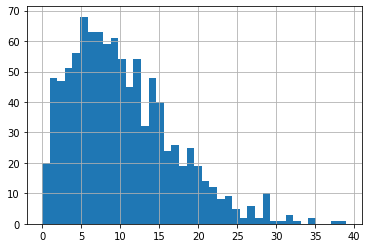

In [72]:
bins = 40
plt.hist(df.y, bins=bins)
plt.grid()
plt.show()

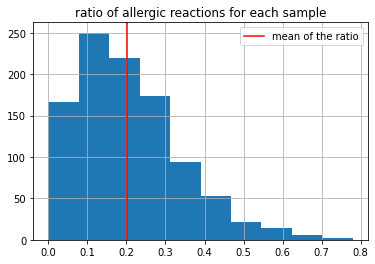

In [73]:
bins = 10
plt.hist(df.y / 50, bins=bins)
plt.axvline(np.mean(df.y / 50), color='r', label='mean of the ratio')
plt.title('ratio of allergic reactions for each sample')
plt.grid()
plt.legend()
plt.show()

In [74]:
print('mean of the ratio = ', np.mean(df.y / 50))

mean of the ratio =  0.20146000000000003


Mean of the ratio is consistent with prior knowledge. Is shows approximately 20% people has an allergic reaction.

# Modeling posterior and posterior predictive distribution

In [75]:
prior = CmdStanModel(stan_file='posterior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [76]:
samples = prior.sample(data={'N': 50, 'y': 7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [77]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-25.8781,0.881331,0.878529,1.0,3.0,0.0,26.3437,0.200682,10.0
1,-25.4353,0.946752,0.878529,2.0,3.0,0.0,26.2677,0.168148,6.0
2,-25.8874,0.596115,0.878529,2.0,3.0,0.0,29.3498,0.106945,3.0
3,-25.3694,1.000000,0.878529,2.0,3.0,0.0,25.7873,0.155432,7.0
4,-26.2346,0.833657,0.878529,1.0,3.0,0.0,26.3740,0.217344,15.0


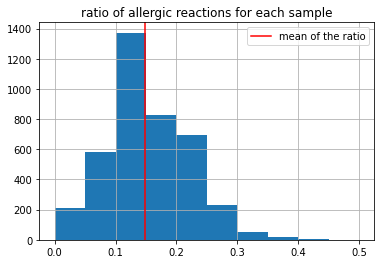

In [78]:
bins = 10
plt.hist(df.y_pred / 50, bins=bins)
plt.axvline(np.mean(df.y_pred / 50), color='r', label='mean of the ratio')
plt.title('ratio of allergic reactions for each sample')
plt.grid()
plt.legend()
plt.show()

In [79]:
print('mean of the ratio = ', np.mean(df.y_pred / 50))

mean of the ratio =  0.148925


In [80]:
y_pred_mean = np.mean(df.y_pred / 50)
y_pred_hdi = az.hdi((df.y_pred / 50).to_numpy(), 0.94)
print('expected value of the predicted ratio = ', y_pred_mean)
print('94% density interval of the predicted ratio = ', y_pred_hdi)

p_mean = np.mean(df.p)
p_hdi = az.hdi(df.p.to_numpy(), 0.94)

print('\nexpected value of the parameter p = ', p_mean)
print('94% density interval of the parameter p = ', p_hdi)

expected value of the predicted ratio =  0.148925
94% density interval of the predicted ratio =  [0.02 0.26]

expected value of the parameter p =  0.14890790175000002
94% density interval of the parameter p =  [0.0648675 0.231163 ]


In [81]:
print('Probability that ratio is lower than the average probability from traditional vaccines = ', np.mean((df.y_pred / 50) < 0.2))

Probability that ratio is lower than the average probability from traditional vaccines =  0.7485
